In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pandas as pd

# Set display option to show all columns
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("df_random.csv")

In [4]:
df =df.drop("Unnamed: 0", axis=1)

In [5]:
df

,ATP,B365_PlayerA,B365_PlayerB,PS_PlayerA,PS_PlayerB,PlayerA_Pts,PlayerB_Pts,match_count_PlayerA,match_count_PlayerB,elo_PlayerA,elo_PlayerB,proba_elo,PlayerA_ID,PlayerB_ID,Surface_Carpet,Surface_Clay,Surface_Grass,Surface_Hard,Tournament_ID,Series_ATP250,Series_ATP500,Series_Grand Slam,Series_International,Series_International Gold,Series_Masters,Series_Masters 1000,Series_Masters Cup,Court_Indoor,Court_Outdoor,Round_1st Round,Round_2nd Round,Round_3rd Round,Round_4th Round,Round_Quarterfinals,Round_Round Robin,Round_Semifinals,Round_The Final,Best_of_3.0,Best_of_5.0,Year,Month,Day,DayOfWeek,PlayerA_Wins
0,1,2.75,1.39,3.040,1.446,1200.0,692.0,2,1,1504.995140,1482.654703,0.467894,279,1,False,False,False,True,1,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,2006,1,2,0,False
1,1,1.53,2.37,1.719,2.290,470.0,265.0,1,0,1484.000000,1500.000000,0.476990,2,19,False,False,False,True,1,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,2006,1,2,0,True
2,1,1.28,3.25,1.391,3.360,731.0,286.0,4,0,1502.708326,1500.000000,0.503898,3,17,False,False,False,True,1,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,2006,1,2,0,True
3,1,2.37,1.53,2.550,1.606,1490.0,690.0,5,0,1490.593267,1500.000000,0.513534,70,4,False,False,False,True,1,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,2006,1,2,0,False
4,1,2.62,1.44,2.720,1.549,1360.0,558.0,6,1,1475.819981,1487.142017,0.516288,26,5,False,False,False,True,1,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,2006,1,2,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44554,67,1.11,6.50,1.140,6.950,4320.0,1746.0,1235,163,1999.225470,1666.726069,0.871470,21,264,False,False,False,True,104,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False,2022,11,4,4,True
44555,67,1.40,3.00,1.450,2.970,5035.0,1330.0,415,231,1862.431885,1762.264077,0.640288,224,135,False,False,False,True,104,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False,2022,11,4,4,True
44556,67,2.75,1.44,2.810,1.500,1991.0,3725.0,153,284,1854.208821,1864.746873,0.484839,150,236,False,False,False,True,104,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,True,False,2022,11,5,5,True
44557,67,4.50,1.20,4.620,1.240,4320.0,5035.0,416,1236,1873.942685,2003.338426,0.678058,224,21,False,False,False,True,104,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,True,False,2022,11,5,5,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44559 entries, 0 to 44558
Data columns (total 44 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ATP                        44559 non-null  int64  
 1   B365_PlayerA               44559 non-null  float64
 2   B365_PlayerB               44559 non-null  float64
 3   PS_PlayerA                 44559 non-null  float64
 4   PS_PlayerB                 44559 non-null  float64
 5   PlayerA_Pts                44559 non-null  float64
 6   PlayerB_Pts                44559 non-null  float64
 7   match_count_PlayerA        44559 non-null  int64  
 8   match_count_PlayerB        44559 non-null  int64  
 9   elo_PlayerA                44559 non-null  float64
 10  elo_PlayerB                44559 non-null  float64
 11  proba_elo                  44559 non-null  float64
 12  PlayerA_ID                 44559 non-null  int64  
 13  PlayerB_ID                 44559 non-null  int

In [14]:
# This cell is only there, if scalling is needed. 
"""
#scalling all the data
from sklearn.preprocessing import StandardScaler

# Selecting columns to scale
columns_to_scale = [col for col in df.columns if df[col].dtype != bool 
                    and col not in ['Year', 'Month', 'Day', 'DayOfWeek']]

# Scale the selected columns
scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Display the updated DataFrame
print(df)
"""

            ATP  B365_PlayerA  B365_PlayerB  PS_PlayerA  PS_PlayerB  \
0     -1.750454      0.017942     -0.479972    0.009979   -0.401935   
1     -1.750454     -0.418668     -0.119626   -0.320844   -0.181828   
2     -1.750454     -0.508138      0.203951   -0.402986    0.097217   
3     -1.750454     -0.118051     -0.428494   -0.112734   -0.360208   
4     -1.750454     -0.028582     -0.461587   -0.070160   -0.375073   
...         ...           ...           ...         ...         ...   
44554  1.885425     -0.568977      1.398979   -0.465844    1.033452   
44555  1.885425     -0.465192      0.112026   -0.388210   -0.004491   
44556  1.885425      0.017942     -0.461587   -0.047621   -0.387852   
44557  1.885425      0.644228     -0.549835    0.405663   -0.455657   
44558  1.885425     -0.518874      0.479727   -0.435793    0.342360   

       PlayerA_Pts  PlayerB_Pts  match_count_PlayerA  match_count_PlayerB  \
0        -0.283650    -0.320004            -0.979234            -0.987

In [8]:
# Creation of X and y for splitt function
data = df.drop('PlayerA_Wins', axis=1)  # features
target = df['PlayerA_Wins']  # target variableb

In [10]:
# creation of data2 frame for modelling: reason behind it, that "data" is unthouched and can always be used, is somthing is wrong
data2=data

In [11]:
# final dataframe for x y split and modeling
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44559 entries, 0 to 44558
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ATP                        44559 non-null  int64  
 1   B365_PlayerA               44559 non-null  float64
 2   B365_PlayerB               44559 non-null  float64
 3   PS_PlayerA                 44559 non-null  float64
 4   PS_PlayerB                 44559 non-null  float64
 5   PlayerA_Pts                44559 non-null  float64
 6   PlayerB_Pts                44559 non-null  float64
 7   match_count_PlayerA        44559 non-null  int64  
 8   match_count_PlayerB        44559 non-null  int64  
 9   elo_PlayerA                44559 non-null  float64
 10  elo_PlayerB                44559 non-null  float64
 11  proba_elo                  44559 non-null  float64
 12  PlayerA_ID                 44559 non-null  int64  
 13  PlayerB_ID                 44559 non-null  int

In [12]:

# Drop of some player specific columns to see if it has any effect on the accuray

data2.drop(['PlayerA_ID', 'PlayerB_ID', 'match_count_PlayerA', 'match_count_PlayerB'], axis=1, inplace=True)


In [13]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44559 entries, 0 to 44558
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ATP                        44559 non-null  int64  
 1   B365_PlayerA               44559 non-null  float64
 2   B365_PlayerB               44559 non-null  float64
 3   PS_PlayerA                 44559 non-null  float64
 4   PS_PlayerB                 44559 non-null  float64
 5   PlayerA_Pts                44559 non-null  float64
 6   PlayerB_Pts                44559 non-null  float64
 7   elo_PlayerA                44559 non-null  float64
 8   elo_PlayerB                44559 non-null  float64
 9   proba_elo                  44559 non-null  float64
 10  Surface_Carpet             44559 non-null  bool   
 11  Surface_Clay               44559 non-null  bool   
 12  Surface_Grass              44559 non-null  bool   
 13  Surface_Hard               44559 non-null  boo

In [14]:
target.info()

<class 'pandas.core.series.Series'>
RangeIndex: 44559 entries, 0 to 44558
Series name: PlayerA_Wins
Non-Null Count  Dtype
--------------  -----
44559 non-null  bool 
dtypes: bool(1)
memory usage: 43.6 KB


In [15]:
# be careful, different data will be used here
X_train, X_test, y_train, y_test = train_test_split (data2, target, test_size = 0.2,  random_state=10)

In [16]:
# test if the splitting worked
X_test

,ATP,B365_PlayerA,B365_PlayerB,PS_PlayerA,PS_PlayerB,PlayerA_Pts,PlayerB_Pts,elo_PlayerA,elo_PlayerB,proba_elo,Surface_Carpet,Surface_Clay,Surface_Grass,Surface_Hard,Tournament_ID,Series_ATP250,Series_ATP500,Series_Grand Slam,Series_International,Series_International Gold,Series_Masters,Series_Masters 1000,Series_Masters Cup,Court_Indoor,Court_Outdoor,Round_1st Round,Round_2nd Round,Round_3rd Round,Round_4th Round,Round_Quarterfinals,Round_Round Robin,Round_Semifinals,Round_The Final,Best_of_3.0,Best_of_5.0,Year,Month,Day,DayOfWeek
22690,33,2.20,1.61,2.260,1.72,1425.0,1425.0,1745.182147,1685.653272,0.415160,False,False,True,False,111,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,2011,6,9,3
12099,19,4.33,1.22,5.590,1.18,2075.0,742.0,1572.289043,1630.737142,0.583329,False,False,False,True,59,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,2020,9,3,3
5137,7,2.25,1.57,2.380,1.64,433.0,404.0,1488.061613,1452.619529,0.449171,False,False,False,True,10,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,2020,2,4,1
10907,19,1.83,1.83,1.909,2.00,315.0,396.0,1447.906405,1425.962249,0.468462,False,False,False,True,58,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,True,False,2007,3,10,5
35004,51,1.66,2.10,1.781,2.18,1391.0,1420.0,1738.996038,1627.015087,0.344204,False,False,False,True,59,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,2005,9,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44124,65,15.00,1.03,24.040,1.02,9545.0,584.0,1468.170445,2084.965830,0.972093,False,False,False,True,104,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,True,False,2019,10,30,2
38035,54,3.50,1.28,3.930,1.30,2090.0,616.0,1613.738089,1775.991575,0.717887,False,False,False,True,170,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,2012,9,27,3
27284,39,1.28,3.75,1.310,3.85,691.0,660.0,1594.086541,1613.764587,0.471711,False,False,True,False,124,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,2016,6,30,3
5851,9,1.53,2.37,1.680,2.31,547.0,243.0,1604.074944,1470.953431,0.682722,False,False,False,True,35,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,2012,1,31,1


In [18]:
# Modelling 

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# Create a Decision Tree classifier object
clf = DecisionTreeClassifier(random_state=42)

# Train Decision Tree Classifier
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9625224416517055


                Feature  Importance_decision_tree
7           elo_PlayerA                  0.254587
8           elo_PlayerB                  0.242550
9             proba_elo                  0.215142
4            PS_PlayerB                  0.208429
5           PlayerA_Pts                  0.033502
6           PlayerB_Pts                  0.024270
35                 Year                  0.002791
37                  Day                  0.002561
14        Tournament_ID                  0.002360
3            PS_PlayerA                  0.002055
0                   ATP                  0.001943
1          B365_PlayerA                  0.001928
38            DayOfWeek                  0.001920
2          B365_PlayerB                  0.001644
36                Month                  0.000741
21  Series_Masters 1000                  0.000422
25      Round_1st Round                  0.000343
26      Round_2nd Round                  0.000312
11         Surface_Clay                  0.000307


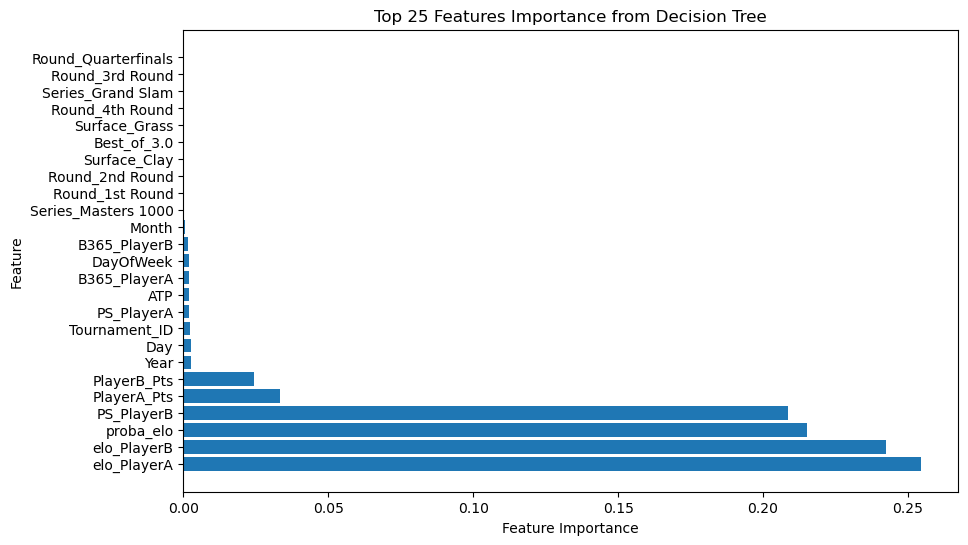

In [97]:
# Train Decision Tree Classifier
clf = clf.fit(X_train, y_train)

# Get feature importances
feature_importances_dt = clf.feature_importances_

def get_top_features(model_name, feature_importances):
    # Create a DataFrame to store feature importances
    feature_importances_df = pd.DataFrame({
        "Feature": X_train.columns,
        f"Importance_{model_name}": feature_importances
    })

    # Sort the DataFrame by importance in descending order and select the top 25 features
    top15_feature = feature_importances_df.sort_values(by=f"Importance_{model_name}", ascending=False).head(25)
    
    return top15_feature

# Get top 25 features for decision tree
top15_feature_decision_tree = get_top_features("decision_tree", feature_importances_dt)

# Display the top 15 features for decision tree
print(top15_feature_decision_tree)

# Plot feature importances for decision tree
plt.figure(figsize=(10, 6))
plt.barh(top15_feature_decision_tree['Feature'], top15_feature_decision_tree[f'Importance_decision_tree'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 25 Features Importance from Decision Tree')
plt.show()

In [98]:
# Create a Random Forest classifier object
clf = RandomForestClassifier(random_state=42)

# Train Random Forest Classifier
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9405296229802513


In [99]:
# Create a Logistic Regression classifier object
clf = LogisticRegression(max_iter=1000, random_state=42)


# Train Logistic Regression Classifier
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6892953321364452


In [ ]:
# FIND OUT WHICH COLUMNS ARE NECCESSARRY

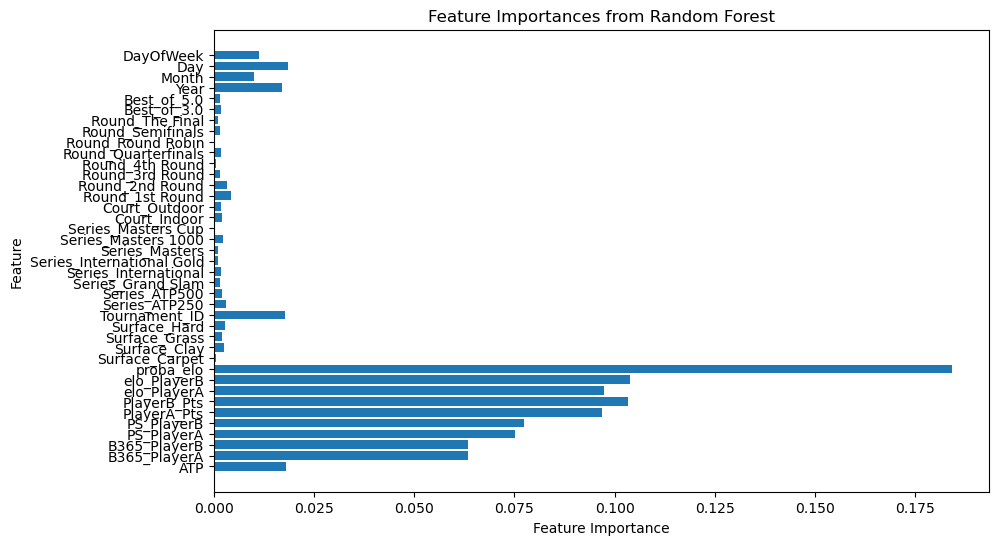

In [100]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Initialize the random forest classifier
rf_classifier = RandomForestClassifier()

# Fit the classifier to obtain feature importances
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest')
plt.show()


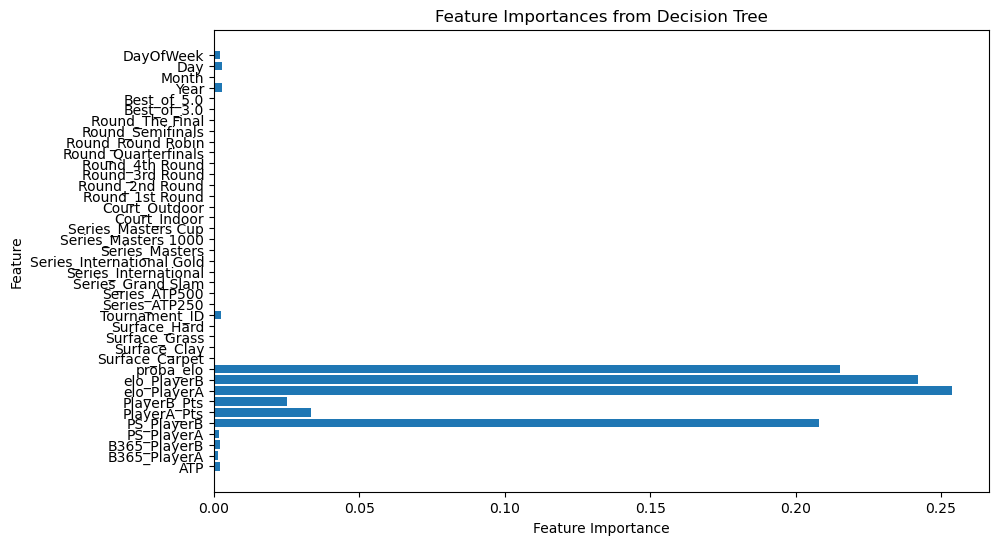

In [101]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the decision tree classifier
dt_classifier = DecisionTreeClassifier()

# Fit the classifier to obtain feature importances
dt_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances_dt = dt_classifier.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, feature_importances_dt)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Decision Tree')
plt.show()


                Feature  Importance_random_forest
9             proba_elo                  0.189748
6           PlayerB_Pts                  0.104122
5           PlayerA_Pts                  0.096827
8           elo_PlayerB                  0.095933
7           elo_PlayerA                  0.095615
3            PS_PlayerA                  0.092000
4            PS_PlayerB                  0.079035
2          B365_PlayerB                  0.067935
1          B365_PlayerA                  0.042649
37                  Day                  0.018721
0                   ATP                  0.018501
14        Tournament_ID                  0.018022
35                 Year                  0.017168
38            DayOfWeek                  0.010946
36                Month                  0.009841
25      Round_1st Round                  0.004205
26      Round_2nd Round                  0.003249
15        Series_ATP250                  0.003094
11         Surface_Clay                  0.002792


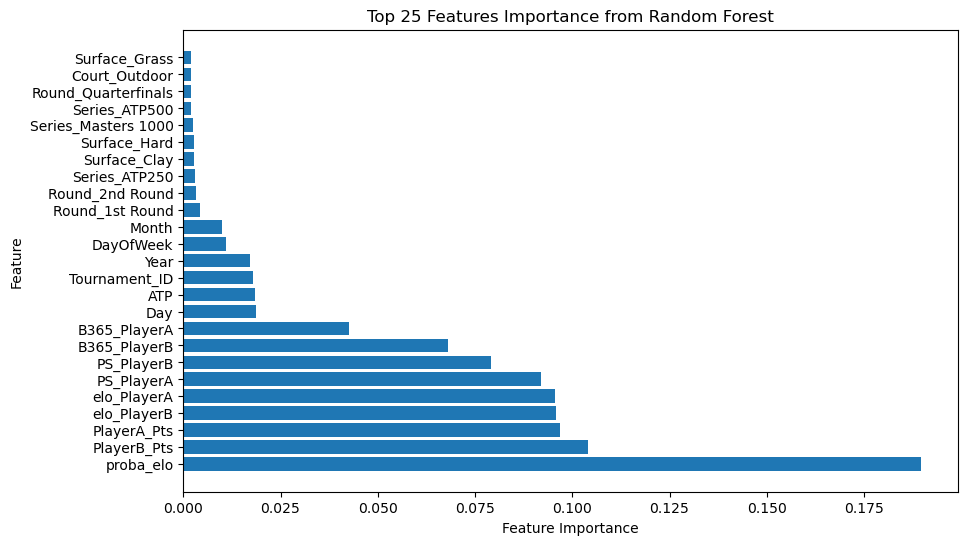

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Initialize the random forest classifier
rf_classifier = RandomForestClassifier()

# Fit the classifier to obtain feature importances
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances_rf = rf_classifier.feature_importances_

def get_top_features(model_name, feature_importances):
    # Create a DataFrame to store feature importances
    feature_importances_df = pd.DataFrame({
        "Feature": X_train.columns,
        f"Importance_{model_name}": feature_importances
    })

    # Sort the DataFrame by importance in descending order and select the top 15 features
    top15_feature = feature_importances_df.sort_values(by=f"Importance_{model_name}", ascending=False).head(25)
    
    return top15_feature

# Get top 15 features for random forest
top15_feature_random_forest = get_top_features("random_forest", feature_importances_rf)

# Display the top 15 features for random forest
print(top15_feature_random_forest)

# Plot feature importances for random forest
plt.figure(figsize=(10, 6))
plt.barh(top15_feature_random_forest['Feature'], top15_feature_random_forest[f'Importance_random_forest'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 25 Features Importance from Random Forest')
plt.show()


              Feature  Importance_decision_tree
8         elo_PlayerB                  0.256840
7         elo_PlayerA                  0.250228
9           proba_elo                  0.221340
4          PS_PlayerB                  0.158023
3          PS_PlayerA                  0.045669
5         PlayerA_Pts                  0.028686
6         PlayerB_Pts                  0.020497
35               Year                  0.002803
14      Tournament_ID                  0.001892
0                 ATP                  0.001849
37                Day                  0.001720
1        B365_PlayerA                  0.001695
36              Month                  0.001422
38          DayOfWeek                  0.001152
2        B365_PlayerB                  0.000986
12      Surface_Grass                  0.000584
34        Best_of_5.0                  0.000505
13       Surface_Hard                  0.000479
31   Round_Semifinals                  0.000407
25    Round_1st Round                  0

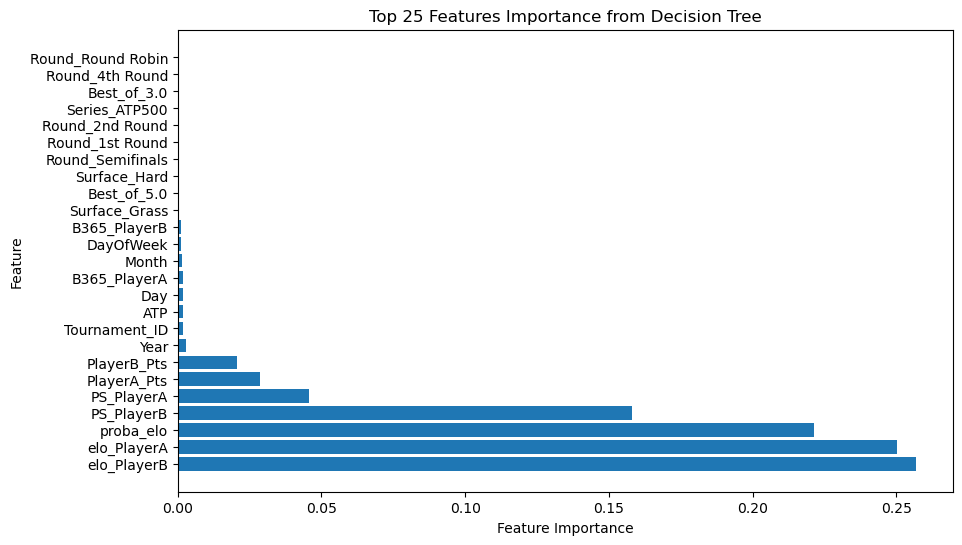

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Initialize the decision tree classifier
dt_classifier = DecisionTreeClassifier()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Fit the classifier to obtain feature importances
dt_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances_dt = dt_classifier.feature_importances_

def get_top_features(model_name, feature_importances):
    # Create a DataFrame to store feature importances
    feature_importances_df = pd.DataFrame({
        "Feature": X_train.columns,
        f"Importance_{model_name}": feature_importances
    })

    # Sort the DataFrame by importance in descending order and select the top 15 features
    top15_feature = feature_importances_df.sort_values(by=f"Importance_{model_name}", ascending=False).head(25)
    
    return top15_feature

# Get top 15 features for decision tree
top15_feature_decision_tree = get_top_features("decision_tree", feature_importances_dt)

# Display the top 15 features for decision tree
print(top15_feature_decision_tree)

# Plot feature importances for decision tree
plt.figure(figsize=(10, 6))
plt.barh(top15_feature_decision_tree['Feature'], top15_feature_decision_tree[f'Importance_decision_tree'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 25 Features Importance from Decision Tree')
plt.show()


In [104]:
top15_feature_decision_tree

,Feature,Importance_decision_tree
8,elo_PlayerB,0.256840
7,elo_PlayerA,0.250228
9,proba_elo,0.221340
4,PS_PlayerB,0.158023
3,PS_PlayerA,0.045669
5,PlayerA_Pts,0.028686
6,PlayerB_Pts,0.020497
35,Year,0.002803
14,Tournament_ID,0.001892
0,ATP,0.001849


In [ ]:
CALCULATION OF ACCUARCY WITH ONLY THE TOP FEATURES 
Important: Although the functions are called top15_feature it represents top 25 --> see head(25) 

                 Feature  Importance_random_forest
9              proba_elo                  0.182006
6            PlayerB_Pts                  0.110109
5            PlayerA_Pts                  0.103085
7            elo_PlayerA                  0.095937
8            elo_PlayerB                  0.095789
4             PS_PlayerB                  0.082940
3             PS_PlayerA                  0.077684
2           B365_PlayerB                  0.058827
1           B365_PlayerA                  0.058028
37                   Day                  0.018736
0                    ATP                  0.018189
14         Tournament_ID                  0.017731
35                  Year                  0.017346
38             DayOfWeek                  0.011012
36                 Month                  0.009672
25       Round_1st Round                  0.004286
26       Round_2nd Round                  0.003449
15         Series_ATP250                  0.003085
11          Surface_Clay       

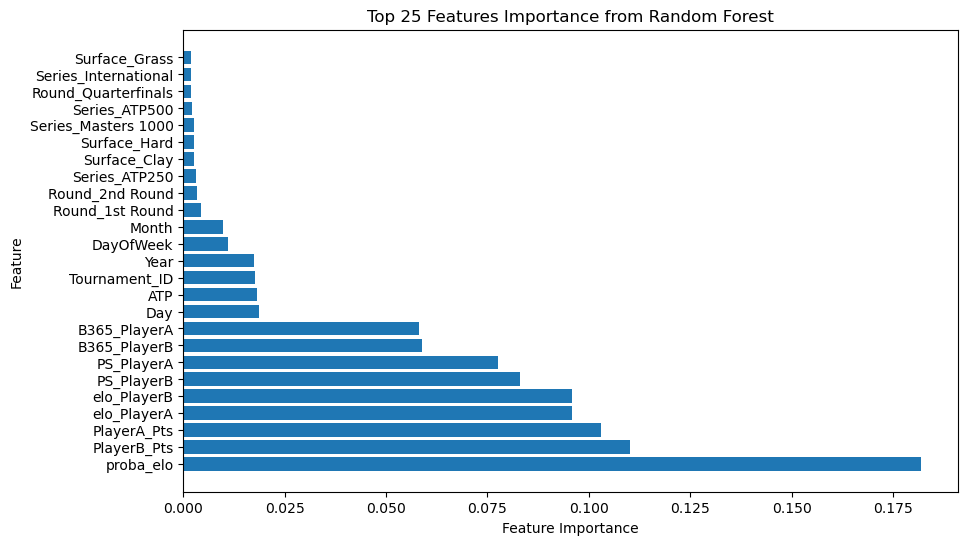

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Initialize the random forest classifier
rf_classifier = RandomForestClassifier()

# Fit the classifier to obtain feature importances
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances_rf = rf_classifier.feature_importances_

def get_top_features(model_name, feature_importances):
    # Create a DataFrame to store feature importances
    feature_importances_df = pd.DataFrame({
        "Feature": X_train.columns,
        f"Importance_{model_name}": feature_importances
    })

    # Sort the DataFrame by importance in descending order and select the top 15 features
    top15_feature = feature_importances_df.sort_values(by=f"Importance_{model_name}", ascending=False).head(25)
    
    return top15_feature

# Get top 15 features for random forest
top15_feature_random_forest = get_top_features("random_forest", feature_importances_rf)

# Display the top 15 features for random forest
print(top15_feature_random_forest)

# Plot feature importances for random forest
plt.figure(figsize=(10, 6))
plt.barh(top15_feature_random_forest['Feature'], top15_feature_random_forest[f'Importance_random_forest'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 25 Features Importance from Random Forest')
plt.show()


In [48]:
top15_feature_random_forest["Feature"]

9                proba_elo
6              PlayerB_Pts
5              PlayerA_Pts
7              elo_PlayerA
8              elo_PlayerB
4               PS_PlayerB
3               PS_PlayerA
2             B365_PlayerB
1             B365_PlayerA
37                     Day
0                      ATP
14           Tournament_ID
35                    Year
38               DayOfWeek
36                   Month
25         Round_1st Round
26         Round_2nd Round
15           Series_ATP250
11            Surface_Clay
13            Surface_Hard
21     Series_Masters 1000
16           Series_ATP500
29     Round_Quarterfinals
18    Series_International
12           Surface_Grass
Name: Feature, dtype: object

In [105]:
import pandas as pd

# Data from your provided index
index = [
    "proba_elo",
    "PlayerB_Pts",
    "PlayerA_Pts",
    "elo_PlayerA",
    "elo_PlayerB",
    "PS_PlayerB",
    "PS_PlayerA",
    "B365_PlayerB",
    "B365_PlayerA",
    "Day",
    "ATP",
    "Tournament_ID",
    "Year",
    "DayOfWeek",
    "Month",
    "Round_1st Round",
    "Round_2nd Round",
    "Series_ATP250",
    "Surface_Clay",
    "Surface_Hard",
    "Series_Masters 1000",
    "Series_ATP500",
    "Round_Quarterfinals",
    "Series_International",
    "Surface_Grass"
]

# Create data3 DataFrame with only the specified columns from data2
data3 = data2[index].copy()

# Display data3
data3


,proba_elo,PlayerB_Pts,PlayerA_Pts,elo_PlayerA,elo_PlayerB,PS_PlayerB,PS_PlayerA,B365_PlayerB,B365_PlayerA,Day,ATP,Tournament_ID,Year,DayOfWeek,Month,Round_1st Round,Round_2nd Round,Series_ATP250,Surface_Clay,Surface_Hard,Series_Masters 1000,Series_ATP500,Round_Quarterfinals,Series_International,Surface_Grass
0,0.467894,692.0,1200.0,1504.995140,1482.654703,1.446,3.040,1.39,2.75,2,1,1,2006,0,1,True,False,False,False,True,False,False,False,True,False
1,0.476990,265.0,470.0,1484.000000,1500.000000,2.290,1.719,2.37,1.53,2,1,1,2006,0,1,True,False,False,False,True,False,False,False,True,False
2,0.503898,286.0,731.0,1502.708326,1500.000000,3.360,1.391,3.25,1.28,2,1,1,2006,0,1,True,False,False,False,True,False,False,False,True,False
3,0.513534,690.0,1490.0,1490.593267,1500.000000,1.606,2.550,1.53,2.37,2,1,1,2006,0,1,True,False,False,False,True,False,False,False,True,False
4,0.516288,558.0,1360.0,1475.819981,1487.142017,1.549,2.720,1.44,2.62,2,1,1,2006,0,1,True,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44554,0.871470,1746.0,4320.0,1999.225470,1666.726069,6.950,1.140,6.50,1.11,4,67,104,2022,4,11,False,False,False,False,True,True,False,True,False,False
44555,0.640288,1330.0,5035.0,1862.431885,1762.264077,2.970,1.450,3.00,1.40,4,67,104,2022,4,11,False,False,False,False,True,True,False,True,False,False
44556,0.484839,3725.0,1991.0,1854.208821,1864.746873,1.500,2.810,1.44,2.75,5,67,104,2022,5,11,False,False,False,False,True,True,False,False,False,False
44557,0.678058,5035.0,4320.0,1873.942685,2003.338426,1.240,4.620,1.20,4.50,5,67,104,2022,5,11,False,False,False,False,True,True,False,False,False,False


In [106]:
# be careful, different data will be used here only top 25
X_train, X_test, y_train, y_test = train_test_split (data3, target, test_size = 0.2,  random_state=10)

In [107]:
# Create a Random Forest classifier object
clf = RandomForestClassifier(random_state=42)

# Train Random Forest Classifier
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9498429084380611


In [108]:
from sklearn.metrics import f1_score

# Compute F1 score
f1 = f1_score(y_test, y_pred)

# Print F1 score
print("F1 Score:", f1)


F1 Score: 0.9503057254030017


In [109]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred)

# Print classification report
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.95      0.95      4399
        True       0.95      0.95      0.95      4513

    accuracy                           0.95      8912
   macro avg       0.95      0.95      0.95      8912
weighted avg       0.95      0.95      0.95      8912



In [110]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)



Confusion Matrix:
[[4191  208]
 [ 239 4274]]


In [111]:
import pandas as pd

# Create the cross-tabulation (confusion matrix)
cross_tab = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

# Print the cross-tabulation
print("Confusion Matrix PlayerA wins:")
print(cross_tab)

Confusion Matrix PlayerA wins:
Predicted  False  True 
Actual                 
False       4191    208
True         239   4274


In [112]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44559 entries, 0 to 44558
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   proba_elo             44559 non-null  float64
 1   PlayerB_Pts           44559 non-null  float64
 2   PlayerA_Pts           44559 non-null  float64
 3   elo_PlayerA           44559 non-null  float64
 4   elo_PlayerB           44559 non-null  float64
 5   PS_PlayerB            44559 non-null  float64
 6   PS_PlayerA            44559 non-null  float64
 7   B365_PlayerB          44559 non-null  float64
 8   B365_PlayerA          44559 non-null  float64
 9   Day                   44559 non-null  int64  
 10  ATP                   44559 non-null  int64  
 11  Tournament_ID         44559 non-null  int64  
 12  Year                  44559 non-null  int64  
 13  DayOfWeek             44559 non-null  int64  
 14  Month                 44559 non-null  int64  
 15  Round_1st Round    

In [114]:
# Calculate the total number of games
total_games = len(X_test)

# Assuming you bet 1 euro on each game
bet_amount_per_game = 1  # You can adjust this if your betting amount differs

# Calculate the total amount of money bet
total_money_bet = total_games * bet_amount_per_game

print("Total amount of money bet:", total_money_bet, "euros")


Total amount of money bet: 8912 euros


In [135]:

# Initialize total money
# Initialize total money and total bet
total_money = 0
total_bet = 0

# Assume you bet 1 unit of money on each game
bet_amount = 1

# Loop through your test set
for i in range(len(X_test)):
    # Get the prediction for the game
    prediction = y_pred[i]
    
    # Get the actual result using iloc
    actual_result = y_test.iloc[i]
    
    # Get the odds for Player A and Player B
    odds_A = X_test.iloc[i]['B365_PlayerA']
    odds_B = X_test.iloc[i]['B365_PlayerB']
    
    # Increase the total bet
    total_bet += bet_amount
    
    # If you predicted Player A wins
    if prediction == 1:
        # If Player A actually wins
        if actual_result == 1:
            # You win the bet, add the money you win to the total
            total_money += odds_A * bet_amount
        else:
            # You lose the bet, subtract the money you bet from the total
            total_money -= bet_amount
    # If you predicted Player B wins
    else:
        # If Player B actually wins
        if actual_result == 0:
            # You win the bet, add the money you win to the total
            total_money += odds_B * bet_amount
        else:
            # You lose the bet, subtract the money you bet from the total
            total_money -= bet_amount

print("Total money after betting:", total_money)
print("Total money bet:", total_bet)



Total money after betting: 14991.610000000184
Total money bet: 8912


In [136]:

# Initialize total money
# Initialize total money and total bet
total_money = 0
total_bet = 0

# Assume you bet 1 unit of money on each game
bet_amount = 1

# Loop through your test set
for i in range(len(X_test)):
    # Get the prediction for the game
    prediction = y_pred[i]
    
    # Get the actual result using iloc
    actual_result = y_test.iloc[i]
    
    # Get the odds for Player A and Player B
    odds_A = X_test.iloc[i]['PS_PlayerA']
    odds_B = X_test.iloc[i]['PS_PlayerB']
 
    # Increase the total bet
    total_bet += bet_amount
    
    # If you predicted Player A wins
    if prediction == 1:
        # If Player A actually wins
        if actual_result == 1:
            # You win the bet, add the money you win to the total
            total_money += odds_A * bet_amount
        else:
            # You lose the bet, subtract the money you bet from the total
            total_money -= bet_amount
    # If you predicted Player B wins
    else:
        # If Player B actually wins
        if actual_result == 0:
            # You win the bet, add the money you win to the total
            total_money += odds_B * bet_amount
        else:
            # You lose the bet, subtract the money you bet from the total
            total_money -= bet_amount

print("Total money after betting:", total_money)
print("Total money bet:", total_bet)



Total money after betting: 15726.18500000006
Total money bet: 8912
